In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# -----------------------------------------
# 1. Load Dataset
# -----------------------------------------

In [4]:
df = pd.read_csv(r"C:\Users\RAJJO MISHRA\Music\Internship By Elevate Labs\Task 5 xploratory Data Analysis (EDA)\train (1).csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("Orginal Shape:", df.shape)

Orginal Shape: (891, 12)


# -----------------------------------------
# 2. Basic Inspection
# -----------------------------------------

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
print(df.isnull().sum)

<bound method DataFrame.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False 

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# -----------------------------------------
# 3. Handling Missing Values
# -----------------------------------------

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\RAJJO MISHRA\AppData\Local\Temp\ipykernel_13820\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\RAJJO MISHRA\AppData\Local\Temp\ipykernel_13820\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [12]:
df.drop(columns=['Cabin'], inplace=True)

# Univariate Analysis

# Plot distribution of passenger ages


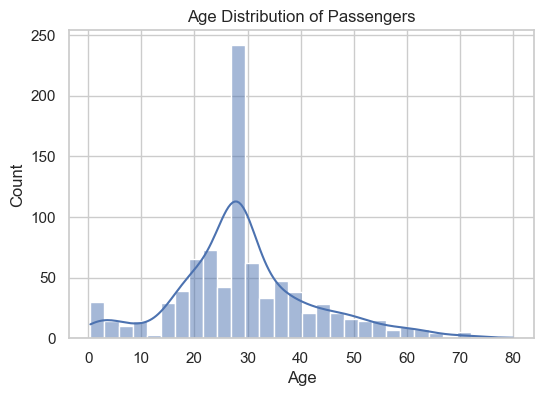

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Boxplot to identify outliers in Fare

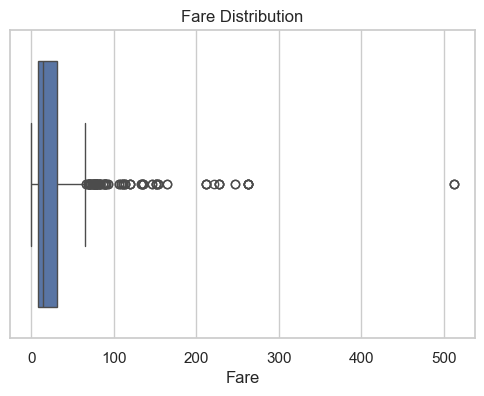

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution")
plt.show()


# Bivariate Analysis

# Survival count based on gender

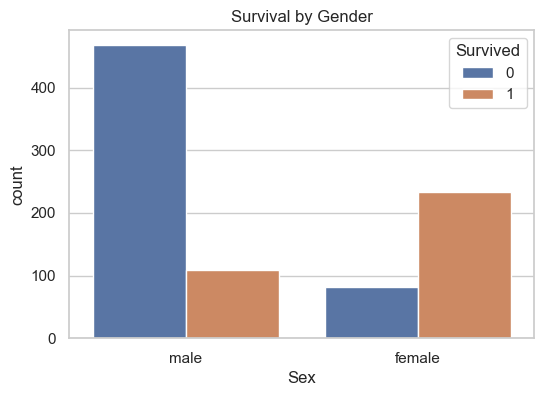

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Survival count based on passenger class

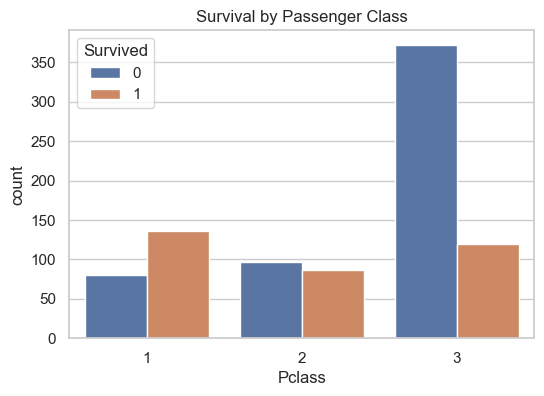

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


# Correlation between numerical variables

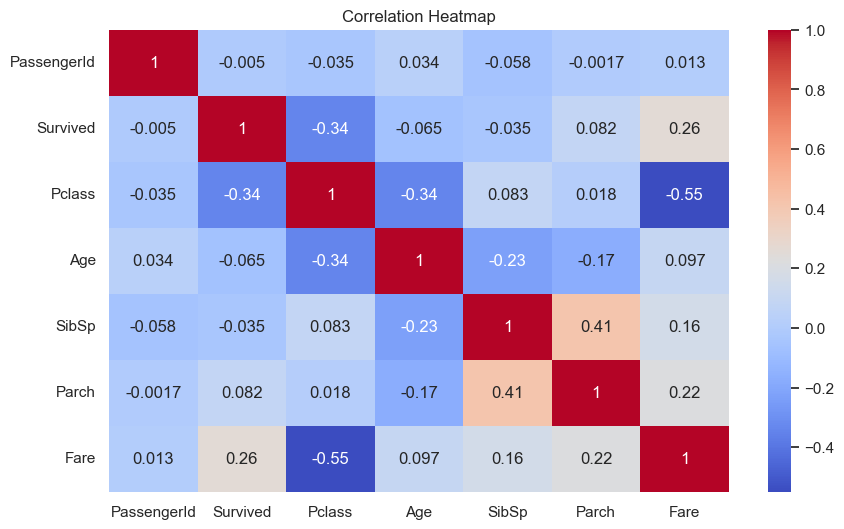

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Pairplot for selected features

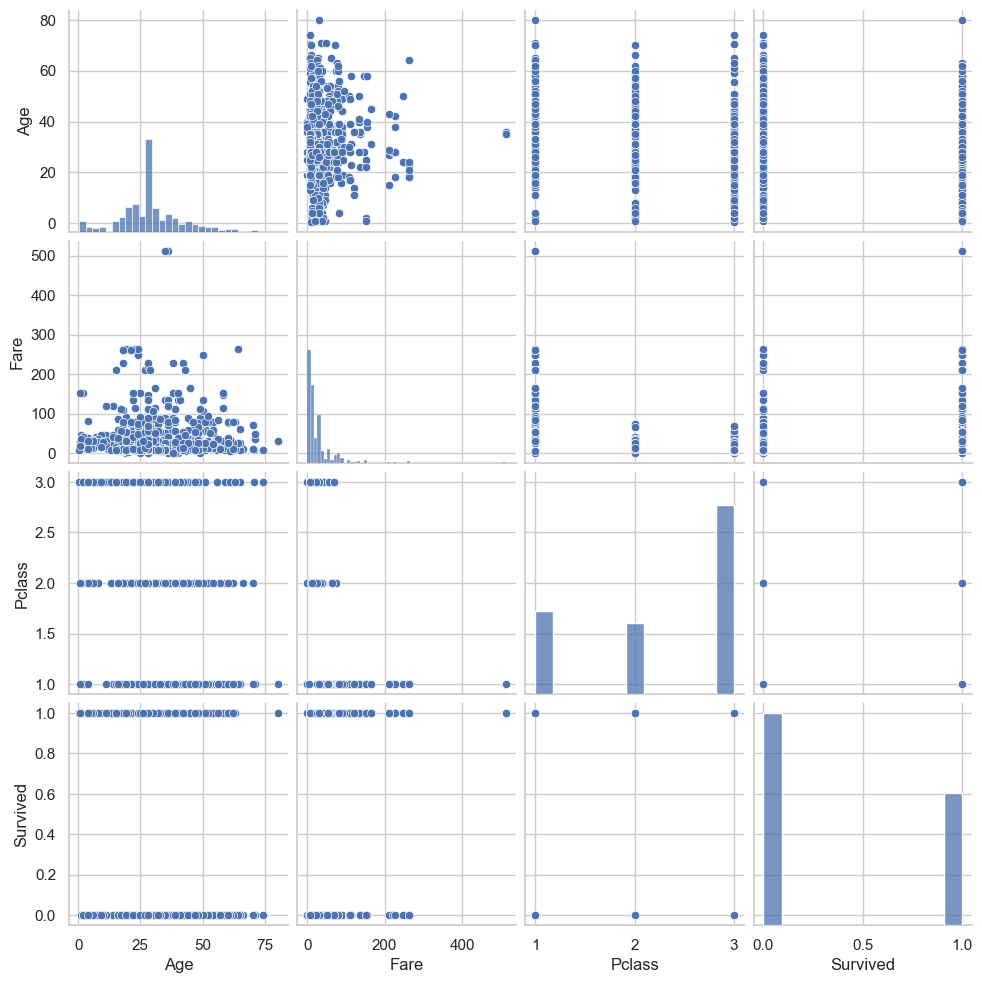

In [19]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()


In [20]:
print("""
Key Insights:
1. Female passengers had a higher survival rate than males.
2. Passengers in 1st class survived more than those in 3rd class.
3. Younger passengers showed better survival chances.
4. Higher fare values are associated with better survival.
5. Fare and Age contain some outliers.
""")



Key Insights:
1. Female passengers had a higher survival rate than males.
2. Passengers in 1st class survived more than those in 3rd class.
3. Younger passengers showed better survival chances.
4. Higher fare values are associated with better survival.
5. Fare and Age contain some outliers.



# Save cleaned dataset for future use

In [21]:
df.to_csv("titanic_cleaned.csv", index=False)
